In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [5]:
df = pd.read_excel("bank_transactions_dataset.xlsx")   
df.head()

,Transaction ID,Date,Description,Debit,Credit,Balance
0,T1001,2023-03-31,Utility Bill Payment,2436.37,0.00,7563.63
1,T1002,2023-06-06,Cheque Deposit,0.00,3405.75,10969.38
2,T1003,2023-03-07,Salary Credit,0.00,2944.07,13913.45
3,T1004,2023-02-12,ATM Withdrawal,1833.80,0.00,12079.65
4,T1005,2023-04-09,Cheque Deposit,0.00,2582.78,14662.43


In [6]:
df.info()
df.describe()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  200 non-null    object 
 1   Date            200 non-null    object 
 2   Description     200 non-null    object 
 3   Debit           200 non-null    float64
 4   Credit          200 non-null    float64
 5   Balance         200 non-null    float64
dtypes: float64(3), object(3)
memory usage: 9.5+ KB


,Transaction ID,Date,Description,Debit,Credit,Balance
0,T1001,2023-03-31,Utility Bill Payment,2436.37,0.00,7563.63
1,T1002,2023-06-06,Cheque Deposit,0.00,3405.75,10969.38
2,T1003,2023-03-07,Salary Credit,0.00,2944.07,13913.45
3,T1004,2023-02-12,ATM Withdrawal,1833.80,0.00,12079.65
4,T1005,2023-04-09,Cheque Deposit,0.00,2582.78,14662.43
5,T1006,2023-01-10,ATM Withdrawal,387.96,0.00,14274.47
6,T1007,2023-02-07,ATM Withdrawal,215.53,0.00,14058.94
7,T1008,2023-01-19,Cash Deposit,0.00,2334.87,16393.81
8,T1009,2023-02-09,Salary Credit,0.00,4013.03,20406.84
9,T1010,2023-05-12,Salary Credit,0.00,4776.02,25182.86


In [6]:
df["Debit"] = pd.to_numeric(df["Debit"], errors="coerce").fillna(0)
df["Credit"] = pd.to_numeric(df["Credit"], errors="coerce").fillna(0)
df["Balance"] = pd.to_numeric(df["Balance"], errors="coerce").fillna(0)


In [7]:
le_desc = LabelEncoder()
df["Description_encoded"] = le_desc.fit_transform(df["Description"])


In [8]:
df["Fraud"] = np.where(
    (df["Debit"] > 50000) | (df["Credit"] > 80000),
    1,
    0
)


In [9]:
X = df[["Description_encoded", "Debit", "Credit", "Balance"]]
y = df["Fraud"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [13]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[40]], dtype=int64)

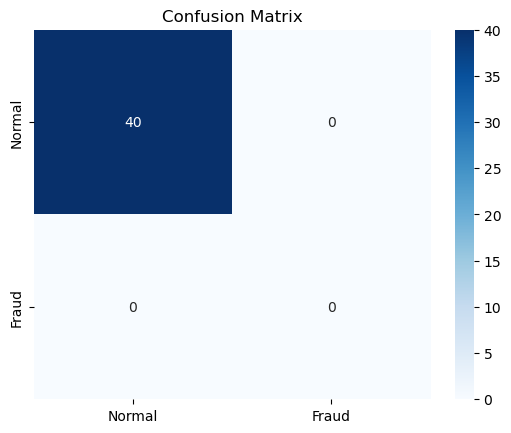

In [35]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1])

sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Normal','Fraud'], 
    yticklabels=['Normal','Fraud']
)
plt.title("Confusion Matrix")
plt.show()


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



               Feature  Importance
0  Description_Encoded         0.0
1                Debit         0.0
2               Credit         0.0
3              Balance         0.0
4                 Year         0.0
5                Month         0.0
6                  Day         0.0
7            DayOfWeek         0.0


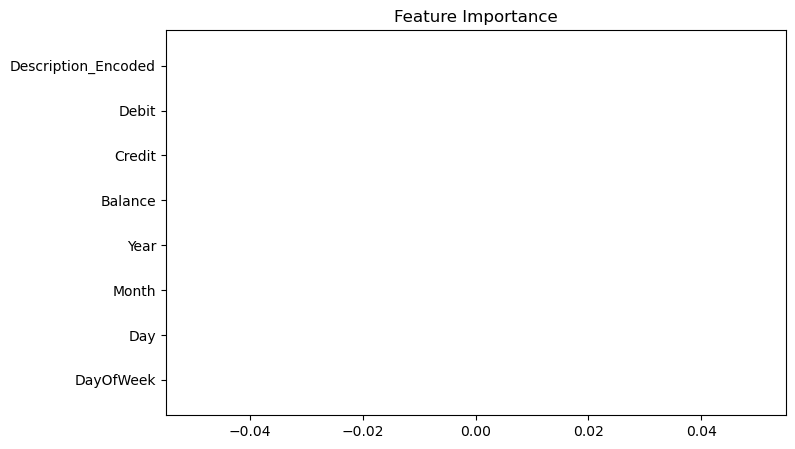

In [37]:
importance = pd.DataFrame({
    'Feature': FEATURES,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance)

plt.figure(figsize=(8,5))
plt.barh(importance['Feature'], importance['Importance'])
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()


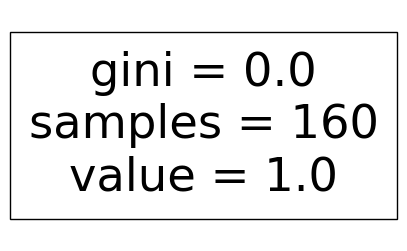

In [42]:
plt.figure(figsize=(5,3))
tree.plot_tree(
    model,
    feature_names=FEATURES,
    class_names=['Normal','Fraud'],
    filled=True
)
plt.show()


In [14]:
joblib.dump(model, "fraud_model.pkl")
joblib.dump(le_desc, "description_encoder.pkl")

print("Model and Encoder saved successfully!")


Model and Encoder saved successfully!
